<a href="https://colab.research.google.com/github/pu-bi/ITB-2022/blob/main/ITB_classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT와비즈니스혁신
###데이터 분류 실습과제
홍보광고학과 1813142 박현영

----

## 라이브러리와 데이터 불러오기

In [1]:
!pip install mglearn --quiet
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mglearn

In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns           
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mining-main/health_data.csv")
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [7]:
df.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


#### - 필요없거나 결측치 많은 컬럼 삭제

In [12]:
df = df.drop(columns = '기준년도')
df = df.drop(columns = '데이터공개일자')
df = df.drop(columns = '가입자일련번호')
df = df.drop(columns = '시도코드')
df = df.drop(columns = '성별코드')
df = df.drop(columns = '흡연상태')
df = df.drop(columns = '음주여부')
df = df.drop(columns = '구강검진수검여부')
df = df.drop(columns = '치아우식증유무')
df = df.drop(columns = '치석')
df = df.drop(columns = '총콜레스테롤')
df = df.drop(columns = '트리글리세라이드')
df = df.drop(columns = 'HDL콜레스테롤')
df = df.drop(columns = 'LDL콜레스테롤')

df

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0
1,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0
2,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0
3,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0
4,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,120.0,13.7,1.0,0.7,20.0,21.0,20.0
9996,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,117.0,14.3,1.0,0.7,24.0,22.0,21.0
9997,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,86.0,15.6,1.0,1.0,22.0,27.0,35.0
9998,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,118.0,13.5,NaN,1.0,26.0,24.0,21.0


## 당뇨에 가장 큰 영향을 미치는 변수가 무엇인지 탐색해보기
#### '식전혈당(공복혈당)' 값이 126 이상인 경우 당뇨로 진단


1. 식전혈당 열의 결측치 제거 및 타겟 열 생성

In [13]:
df['식전혈당(공복혈당)'].isna().sum()

88

In [14]:
df.dropna(subset=['식전혈당(공복혈당)'], how='any', axis=0, inplace=True)
df.dropna(subset=['요단백'], how='any', axis=0, inplace=True)

In [15]:
df['식전혈당(공복혈당)'].isna().sum()

0

In [16]:
sum(df['식전혈당(공복혈당)'] >= 126)

1001

In [17]:
list_ans = []
for row in df['식전혈당(공복혈당)']:
  if row >= 126:
    list_ans.append(1)
  else:
    list_ans.append(0)

In [18]:
list_ans.count(1)

1001

In [19]:
df['diabetes'] = list_ans

In [20]:
df[['식전혈당(공복혈당)','diabetes']].head(30)

,식전혈당(공복혈당),diabetes
0,90.0,0
1,87.0,0
2,102.0,0
3,146.0,1
4,110.0,0
5,86.0,0
6,250.0,1
7,93.0,0
8,104.0,0
9,85.0,0


식전혈당이 126 이상인 열에 1이 잘 대입되어 들어갔음을 확인

### 당뇨와 당뇨가 아닌 사람의 비율 확인

0    8860
1    1001
Name: diabetes, dtype: int64


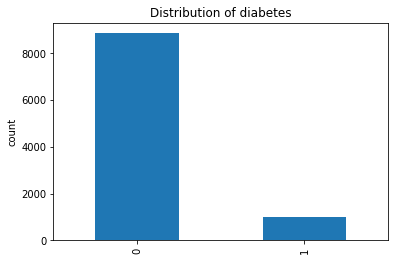

In [21]:
print(df['diabetes'].value_counts())

df['diabetes'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of diabetes')
plt.show()

In [22]:
df

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,diabetes
0,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,0
1,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,0
2,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,0
3,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1
4,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,17,150,55,95.0,0.5,0.8,1,1,120.0,66.0,115.0,15.7,1.0,1.1,22.0,21.0,18.0,0
9995,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,120.0,13.7,1.0,0.7,20.0,21.0,20.0,0
9996,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,117.0,14.3,1.0,0.7,24.0,22.0,21.0,0
9997,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,86.0,15.6,1.0,1.0,22.0,27.0,35.0,0


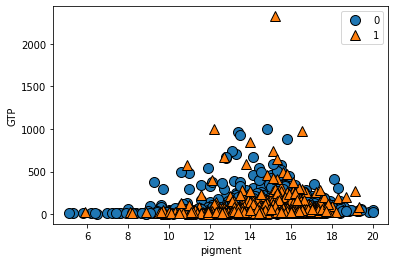

In [26]:
mglearn.discrete_scatter(df['혈색소'], df['감마지티피'], df['diabetes'])
plt.xlabel("pigment")
plt.ylabel("GTP")
plt.legend()
plt.show()

모델 생성 위해 당뇨의 기준이 되는 열 삭제

In [27]:
df = df.drop(columns = '식전혈당(공복혈당)')

# 의사결정나무

In [37]:
X = df.iloc[:, :-1]
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.832


### graphviz 라이브러리를 이용하여 의사결정나무 그리기 

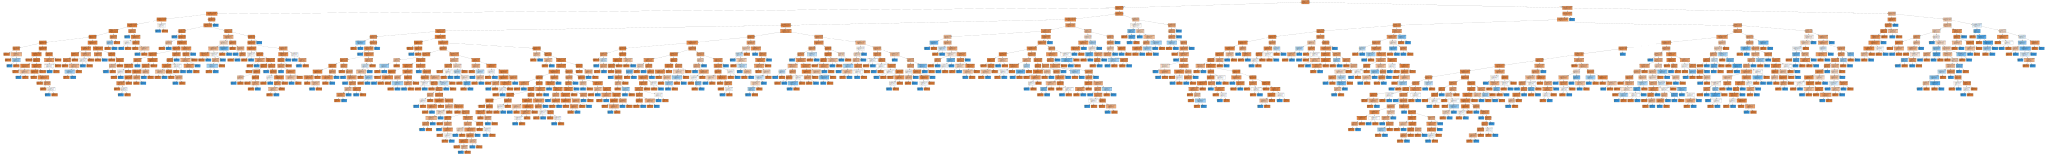

In [38]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "안당뇨", "당뇨"],
                feature_names=df.columns[:-1], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))


# 스크롤 넘기시면 그림이 보입니다..!!

### 주요 변수들 (features)

In [40]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.05442391 0.03507774 0.04237904 0.09496374 0.05337467 0.05501004
 0.0066247  0.01248669 0.08800421 0.08332227 0.11375031 0.02473934
 0.04998342 0.0878545  0.09889331 0.09911212]


In [42]:
res = pd.DataFrame(result)
res["name"] = df.columns[:-1]
display(res.info())

display(res.sort_values(by=0, ascending=False))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16 non-null     float64
 1   name    16 non-null     object 
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


None

,0,name
10,0.113750,혈색소
15,0.099112,감마지티피
14,0.098893,(혈청지오티)ALT
3,0.094964,허리둘레
8,0.088004,수축기혈압
13,0.087854,(혈청지오티)AST
9,0.083322,이완기혈압
5,0.055010,시력(우)
0,0.054424,연령대코드(5세단위)
4,0.053375,시력(좌)


의사결정나무로 분류해본 결과 식전혈당은 혈색소, 감마지티피, ALT 등과 큰 연관을 가지고 있다는 사실을 확인할 수 있었습니다.

# 랜덤 포레스트 (Random forest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


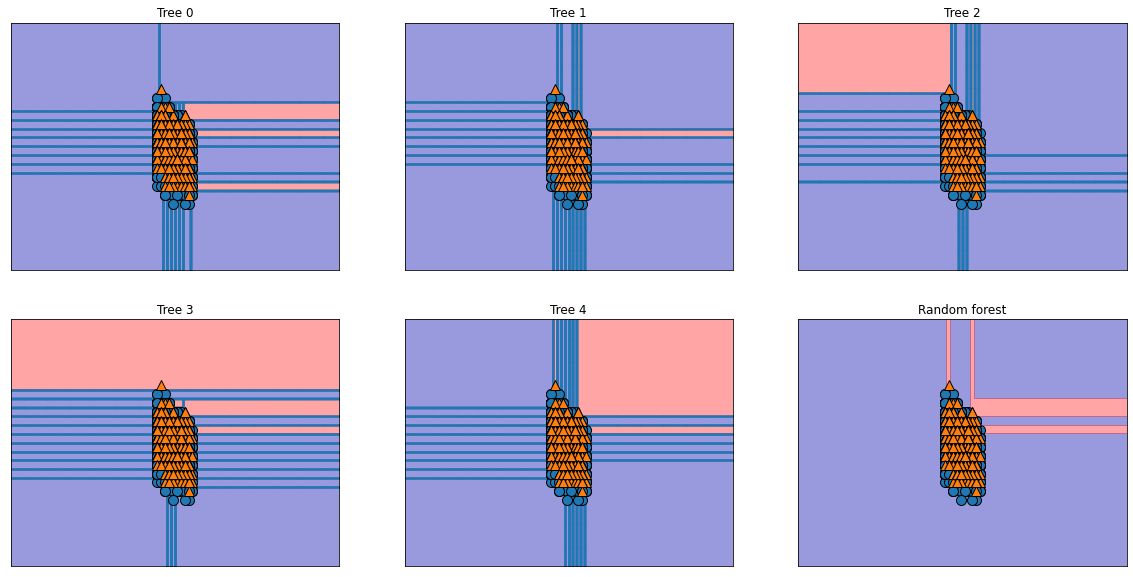

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [49]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.902


# 그래디언트 부스팅 (Gradient Boosting)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [53]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.906
시험용 데이터 세트 정확도: 0.900


In [65]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.901
시험용 데이터 세트 정확도: 0.902


그래디언트 부스팅의 경우 나무 깊이가 2일때 가장 정확도가 높았다

# 분류 모델 평가 (Evaluation)
### 교차 검증 (Cross validation)

In [68]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.81081081 0.8027027  0.84864865 0.81486486 0.80810811 0.82543978
 0.81596752 0.8240866  0.8308525  0.8376184 ]
Random forest:  [0.8972973  0.8972973  0.8972973  0.89594595 0.8972973  0.8985115
 0.89715832 0.89715832 0.89715832 0.89715832]
Gradient boosting:  [0.89189189 0.8972973  0.89864865 0.89324324 0.8972973  0.8985115
 0.89445196 0.89445196 0.89580514 0.8985115 ]
Accuracy mean
Decision tree :0.822
Random forest :0.897
Gradient boosting :0.896


가장 정확도가 높은 모델은 랜덤포레스트 모델이었으며,


의사결정나무로 살펴본 결과,
당뇨 즉 식전혈당이 126이상으로 나오는데에 가장 큰 영향을 미치는 변수 3개는
혈색소, 감마지티피, ALT라는 사실을 알 수 있었다.